In [98]:
using Plots

The thermo-chemical equations are formulated as:
$$
\begin{align}
\rho \frac{\mathrm{d} c}{\mathrm{d} t} &= D\Delta \mu 
 \\
\rho c_P \frac{\mathrm{d} T}{\mathrm{d} t} &= k\Delta T + D(\nabla\mu)^2   
\end{align}
$$

We will assume a linearised chemical diffusion model:
$$
    \mu = c
$$

1) Express the Laplacian of temperature and chemical potential
2) Compute the gradient of chemical potential (`∂μ∂x`)
3) Interpolate the gradient of chemical potential to the vertices, use averaging (`∂μ∂xin`), e.g.: `ain .= 0.5*(a[1:end-1] .+ a[2:end])`
5) Update temperature `T` and concentration `C`

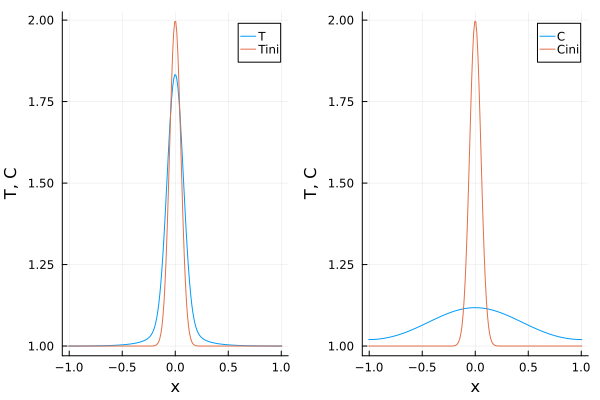

In [99]:
# Physical parameters
xmax =-1.0
xmin = 1.0
k    = 1.0
D    = 1e2
ρ    = 1.0
cp   = 1.0
σ    = 0.075

# Numerical parameters
ncx  = 200
nt   = 2000
Δx   = (xmax-xmin)/ncx
Δt_T = Δx^2/(k/ρ/cp)/2
Δt_C = Δx^2/(D/ρ)/2
Δt   = min(Δt_T, Δt_C)

# Initial model configuration
xce    = LinRange(xmin-Δx/2, xmax+Δx/2, ncx+2)
T      = zeros(ncx+2)
T      = 1 .+ exp.(-xce.^2/σ^2)
C      = 1 .+ exp.(-xce.^2/σ^2)
μ      = μ0 .+ R.*T.*log.(C)
Tini   = copy(T)
Cini   = copy(T)
ΔT     = zeros(ncx)
Δμ     = zeros(ncx)
u      = ρ*cp*T
s      = zeros(ncx+2)
qu     = zeros(ncx+1)
qs     = zeros(ncx+1)
qc     = zeros(ncx+1)
Tin    = zeros(ncx+1)   
μin    = zeros(ncx+1)
Qs     = zeros(ncx)
∂T∂x   = zeros(ncx+1)
∂μ∂x   = zeros(ncx+1)
∂μ∂xin = zeros(ncx)

# Time loop
for it=1:nt

    # Impose zeros flux at the E/W sides
    T[1]   = T[2]
    T[end] = T[end-1]
    C[1]   = C[2]
    C[end] = C[end-1]

    # Chemical Potential
    μ    .= C

    # Compute Laplacian
    # ΔT    .= ...
    # Δμ    .= ...

    # Gradient of chemical potential
    # ∂μ∂x   .= ...
    # ∂μ∂xin .= ... 
 
    # Update T / C 
    # T[2:end-1] .= ...
    # C[2:end-1] .= ...
end

p1 = plot(xce, [T Tini], label=["T" "Tini"], xlabel="x", ylabel="T, C")
p2 = plot(xce, [C Cini], label=["C" "Cini"], xlabel="x", ylabel="T, C")
display(plot(p1, p2))

The entropy production is expressed as:
$$
TQ_s = D(\nabla\mu)^2  +  \frac{k}{T}  (\nabla T)^2
$$
The fluxes are expressed as:
$$
\begin{align}
\mathbf{q_s} &= -\frac{k}{T}\nabla T \\
\mathbf{q_c} &= -D\nabla \mu \\
\mathbf{q_u} &= T\mathbf{q_s} +  \mu\mathbf{q_c}
\end{align}
$$

1) Compute the entropy, chemical, and internal energy flux. Achtung: the fluxes are on the vertices of the grid, therefore use interpolated values of chemical potetial and temperature (`μin` and `Tin`).
2) Compute the entropy production rate. Achtung: the entropy production rate is on the inner centroids, so use use the values of `T` and `μ` from the inner vertices (e.g., `a[2:end-1]`)
3) Update the entropy balance and the energy conservation equation.  

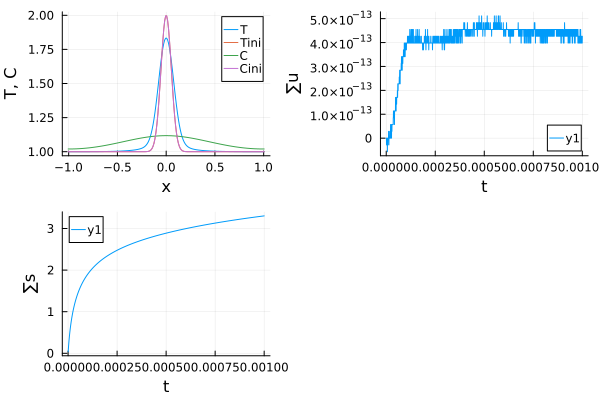

In [100]:
# Physical parameters
xmax =-1.0
xmin = 1.0
k    = 1.0
D    = 1e2
ρ    = 1.0
cp   = 1.0
σ    = 0.075

# Numerical parameters
ncx  = 200
nt   = 2000
Δx   = (xmax-xmin)/ncx
Δt_T = Δx^2/(k/ρ/cp)/2
Δt_C = Δx^2/(D/ρ)/2
Δt   = min(Δt_T, Δt_C)

# Initial model configuration
xce     = LinRange(xmin-Δx/2, xmax+Δx/2, ncx+2)
T       = zeros(ncx+2)
T       = 1 .+ exp.(-xce.^2/σ^2)
C       = 1 .+ exp.(-xce.^2/σ^2)
μ       = μ0 .+ R.*T.*log.(C)
Tini    = copy(T)
Cini    = copy(T)
ΔT      = zeros(ncx)
Δμ      = zeros(ncx)
u       = ρ*cp*T
s       = zeros(ncx+2)
qu      = zeros(ncx+1)
qs      = zeros(ncx+1)
qc      = zeros(ncx+1)
Tin     = zeros(ncx+1)   
μin     = zeros(ncx+1)
Qs      = zeros(ncx)
∂T∂x    = zeros(ncx+1)
∂μ∂x    = zeros(ncx+1)
∂μ∂xin  = zeros(ncx)
u_check = zeros(nt)
s_check = zeros(nt)

# Time loop
for it=1:nt

    # Impose zeros flux at the E/W sides
    T[1]   = T[2]
    T[end] = T[end-1]
    C[1]   = C[2]
    C[end] = C[end-1]

    # Chemical Potential
    μ    .= C

    # Compute Laplacian
    # ΔT    .= ...
    # Δμ    .= ...

    # Flux and production terms
    Tin    .= 0.5*(T[1:end-1] .+ T[2:end]) 
    μin    .= 0.5*(μ[1:end-1] .+ μ[2:end]) 
    # qs     .= ...
    # qc     .= ...
    # qu     .= ...
    # ∂T∂x   .= ...
    # ∂μ∂x   .= ...
    ∂T∂xin .= 0.5*(∂T∂x[1:end-1] .+ ∂T∂x[2:end])
    ∂μ∂xin .= 0.5*(∂μ∂x[1:end-1] .+ ∂μ∂x[2:end]) 
    # Qs     .= 

    # Update T / C / u / s
    # T[2:end-1] .= T[2:end-1] .+ ...
    # C[2:end-1] .= C[2:end-1] .+ ... 
    # u[2:end-1] .= u[2:end-1] .+ ...    
    # s[2:end-1] .= s[2:end-1] .+ ...

    # Save the sum of energy and the sum of entropy 
    u_check[it] = sum(u)
    s_check[it] = sum(s)

end

p1 = plot()
p1 = plot!(xce, [T Tini], label=["T" "Tini"], xlabel="x", ylabel="T, C")
p1 = plot!(xce, [C Cini], label=["C" "Cini"], xlabel="x", ylabel="T, C")
p2 = plot((1:nt).*Δt, u_check .- u_check[1], xlabel="t", ylabel="∑u")
p3 = plot((1:nt).*Δt, s_check, xlabel="t", ylabel="∑s")
display(plot(p1, p2, p3))